In [2]:
%matplotlib inline

# Demo of RerF Parameter sweep over (d, $\lambda$) on Fisher's Iris data.

In Figure 3 of [Tomita et al. arXiv-v4](https://arxiv.org/pdf/1506.03410v4.pdf) they show results of a parameter sweep on a large set of datasets.  
Here we show the same parameter sweep on Fisher's Iris dataset.

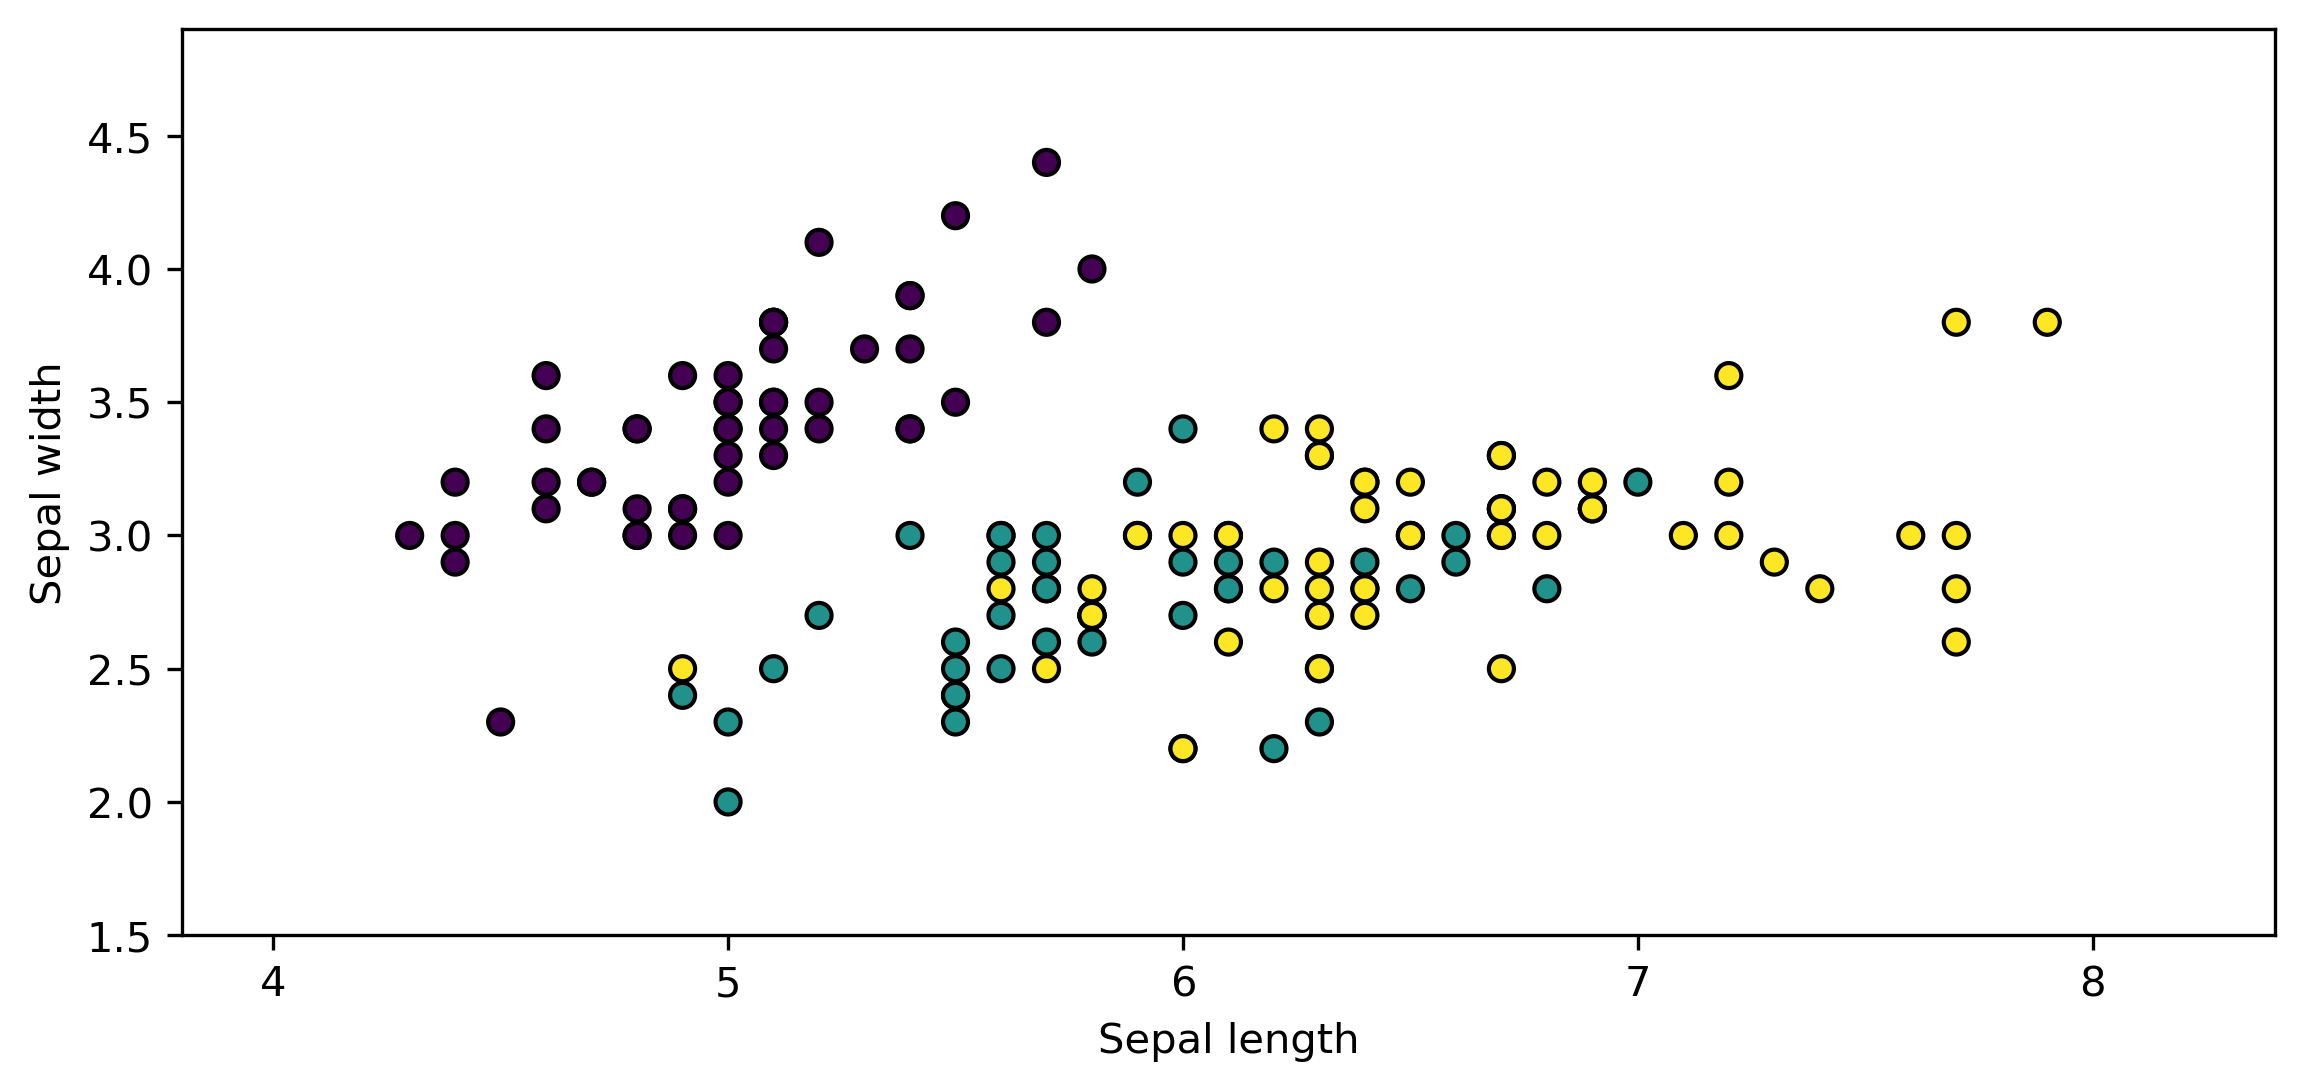

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from rerf.rerfClassifier import rerfClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

matplotlib.rc('figure', figsize=[12,8], dpi = 300)
plt.figure(figsize=(9,4))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

### Here we set the parameters to sweep over and gather the results.

In [4]:
mtry = [4,3,2,1]
mtryMult = [round(i/100 + 0.4, 1) for i in range(0, 400, 40)] 
parameters = {'max_features':mtry, "feature_combinations": mtryMult}
rf = rerfClassifier(projection_matrix = "RerF")
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(iris.data, iris.target)

mtry = np.asarray(mtry)
Lambda = np.asarray(mtryMult)
r = np.asarray(clf.cv_results_['rank_test_score']).reshape(len(mtry),len(mtryMult))

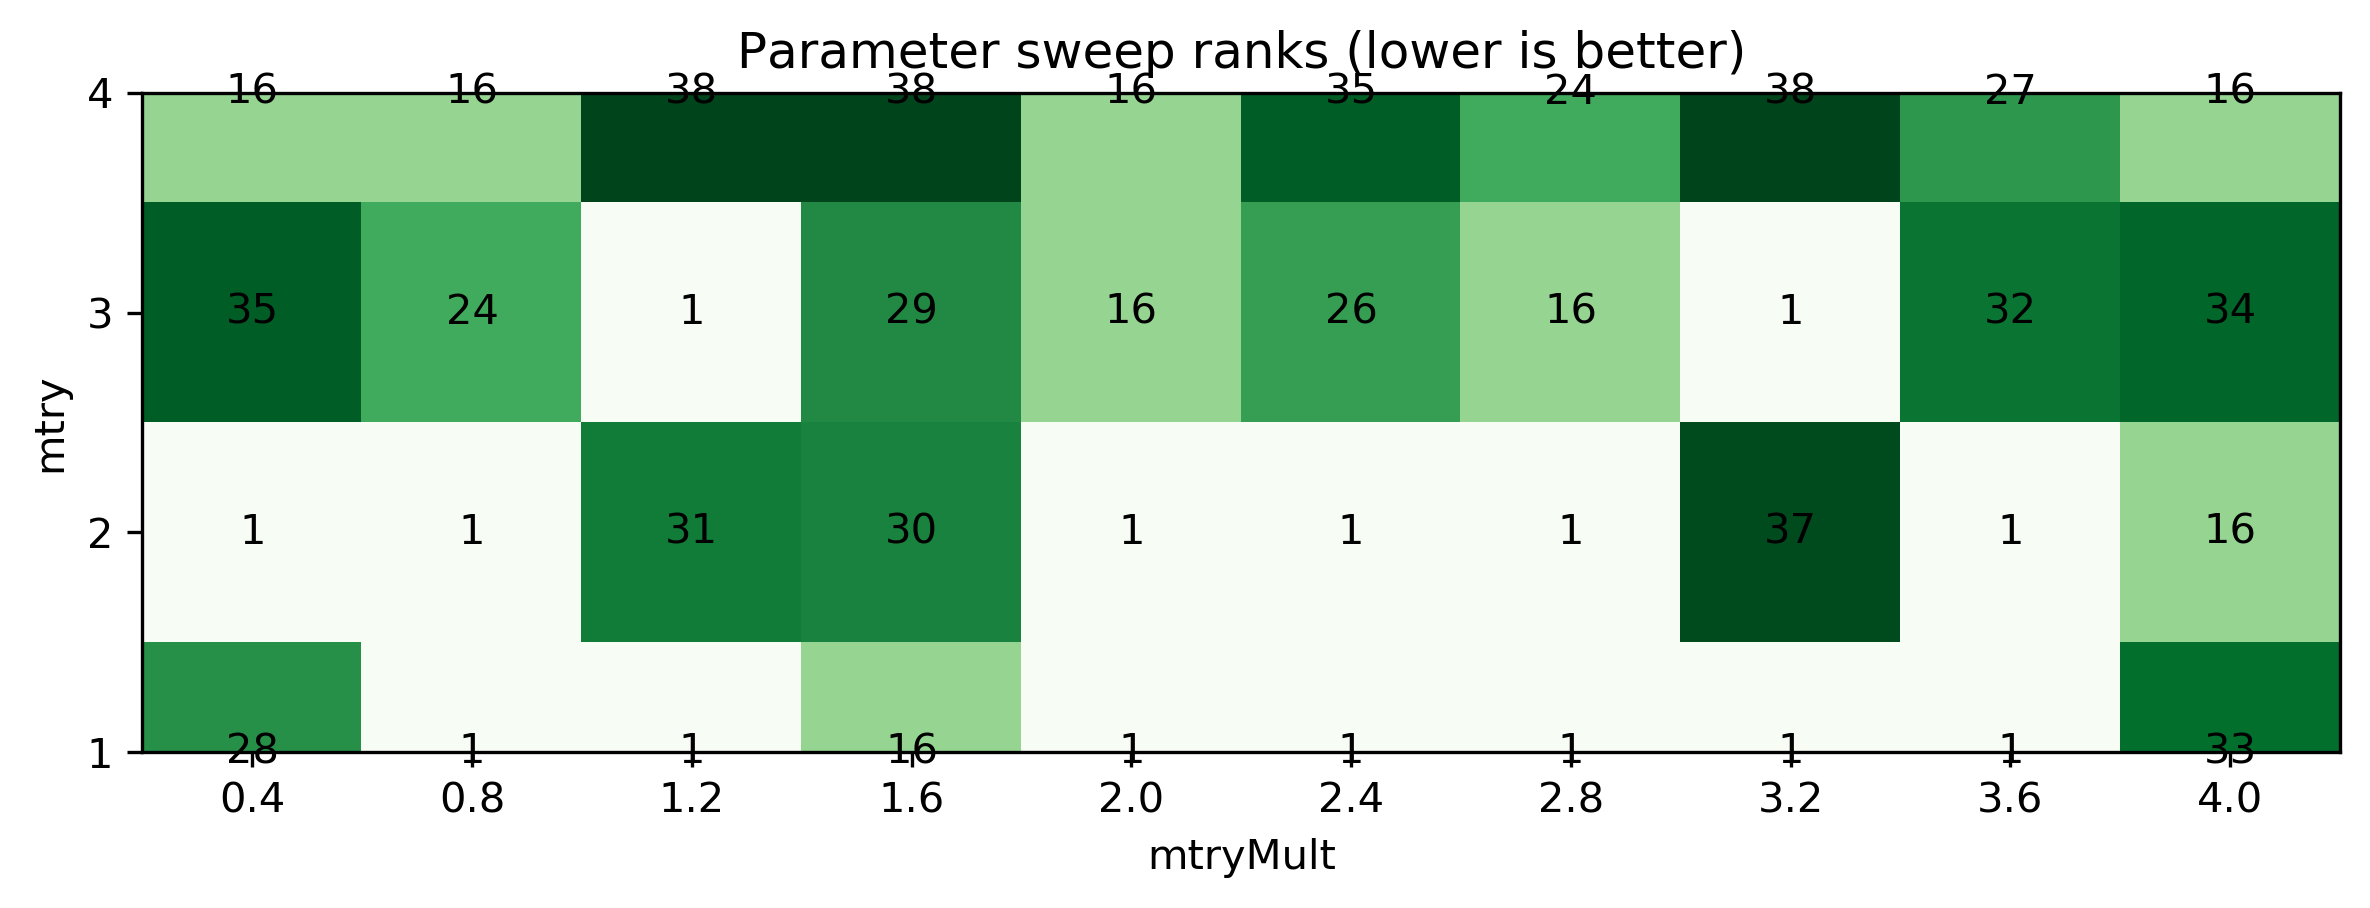

In [5]:
matplotlib.rc('figure', figsize=[12,8], dpi = 300)
fig, ax = plt.subplots(figsize = (8,6))
im = ax.imshow(r, cmap = 'Greens')

# We want to show all ticks...
ax.set_xticks(np.arange(len(Lambda)))
ax.set_yticks(np.arange(len(mtry)))
# ... and label them with the respective list entries
ax.set_xticklabels(Lambda)
ax.set_yticklabels(mtry)
plt.xlabel('mtryMult')
plt.ylabel('mtry')

# Loop over data dimensions and create text annotations.
for i in range(len(mtry)):
    for j in range(len(Lambda)):
        text = ax.text(j, i, r[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Parameter sweep ranks (lower is better)")
fig.tight_layout()
#fig.set_size_inches(20,6)
plt.show()